# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['albany',
 'puerto ayora',
 'cape town',
 'davila',
 'luderitz',
 'butaritari',
 'grand centre',
 'portland',
 'hilo',
 'umzimvubu',
 'itoman',
 'mount isa',
 'rikitea',
 'ushuaia',
 'east london',
 'victoria',
 'san patricio',
 'bluff',
 'kachikau',
 'busselton',
 'arraial do cabo',
 'illoqqortoormiut',
 'kampong thum',
 'lompoc',
 'vao',
 'longyearbyen',
 'ocos',
 'buala',
 'hasaki',
 'port elizabeth',
 'barentsburg',
 'hithadhoo',
 'jamestown',
 'new norfolk',
 'bengkulu',
 'vaini',
 'aklavik',
 'kahului',
 'punta arenas',
 'usevya',
 'hermanus',
 'buluang',
 'airai',
 'burnie',
 'shaygino',
 'mitsamiouli',
 'murray bridge',
 'san bartolome de tirajana',
 'kapaa',
 'hobart',
 'polyarnyy',
 'coquimbo',
 'mount gambier',
 'tommot',
 'ancud',
 'mataura',
 'tuktoyaktuk',
 'laramie',
 'barrow',
 'berdyuzhye',
 'belushya guba',
 'yellowknife',
 'antonovo',
 'mar del plata',
 'kelvington',
 'avarua',
 'gushikawa',
 'leningradskiy',
 'upernavik',
 'miri',
 'torbay',
 'rio grande',
 'fortun

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
city_test = random.sample(cities, k=60)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

cities1 = []
temp = []
humidity = []
clouds = []
windspeed = []
lats = []

for city in city_test:
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    try:
        url_city=(query_url).replace(" ","+")
        response=requests.get(url_city).json()
        cities1.append(response["name"])
        temp.append(response['main']["temp"])
        humidity.append(response['main']["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response['wind']["speed"])
        lats.append(response["coord"]["lat"])
        print(f'Processing number {(city_test.index(city)+1)}, which is {city}')
    except:
        print(f'Processing number {(city_test.index(city)+1)}, which is {city} and has no information')

Processing number 1, which is puerto ayora
Processing number 2, which is bengkulu and has no information
Processing number 3, which is antonovo
Processing number 4, which is chuy
Processing number 5, which is khatanga
Processing number 6, which is luanda
Processing number 7, which is fergus falls
Processing number 8, which is larsnes
Processing number 9, which is satitoa and has no information
Processing number 10, which is saint george
Processing number 11, which is puerto narino
Processing number 12, which is weligama
Processing number 13, which is nizhneyansk and has no information
Processing number 14, which is iracoubo
Processing number 15, which is calbuco
Processing number 16, which is chokurdakh
Processing number 17, which is inuvik
Processing number 18, which is the valley
Processing number 19, which is kulhudhuffushi
Processing number 20, which is sobolevo
Processing number 21, which is piterka
Processing number 22, which is bundaberg
Processing number 23, which is sentyabrsk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
CitiesDF = pd.DataFrame({"City": cities1,
                        "Temperature": temp,
                        "Humidity": humidity,
                        "Clouds" : clouds,
                        "Windspeed": windspeed,
                        "Latitude": lats
                         })
CitiesDF.to_csv("CitiesDF.csv", index=False)
CitiesDF

,City,Temperature,Humidity,Clouds,Windspeed,Latitude
0,Puerto Ayora,27.83,70,20,5.70,-0.74
1,Antonovo,-0.55,67,100,2.49,55.82
2,Chuy,18.55,65,11,6.00,-33.69
3,Khatanga,-19.95,90,86,3.21,71.98
4,Luanda,27.00,83,75,4.10,-8.83
5,Fergus Falls,21.06,52,1,2.29,46.28
6,Larsnes,9.00,87,75,8.70,62.20
7,Saint George,7.47,75,40,2.10,39.45
8,Puerto Narino,28.00,83,40,1.50,-3.77
9,Weligama,29.15,77,100,7.01,5.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

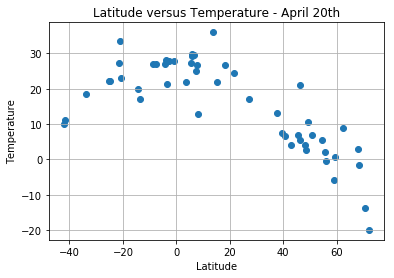

In [45]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Temperature"])
plt.title("Latitude versus Temperature - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig('Lat_v_Temp.pdf')

#### Latitude vs. Humidity Plot

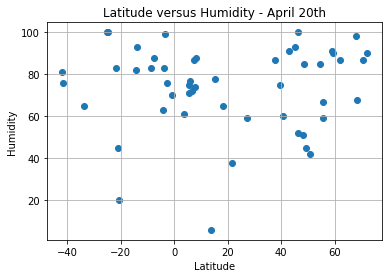

In [46]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Humidity"])
plt.title("Latitude versus Humidity - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig('Lat_v_Humidity.pdf')

#### Latitude vs. Cloudiness Plot

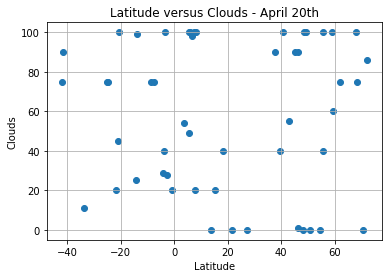

In [47]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Clouds"])
plt.title("Latitude versus Clouds - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid(True)
plt.savefig('Lat_v_Cloudiness.pdf')

#### Latitude vs. Wind Speed Plot

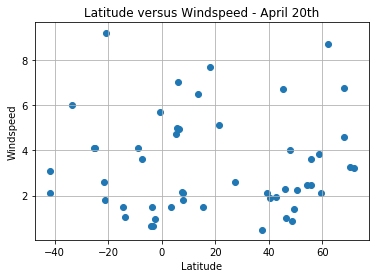

In [48]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Windspeed"])
plt.title("Latitude versus Windspeed - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid(True)
plt.savefig('Lat_v_Windspeed.pdf')